In [15]:
import os


# task_name = "navalpropulsion"
# task_name = "parkinsonstelemonitoring"
# task_name = "proteinstructure"
task_name = "slicelocalization"
os.environ["DEEPHYPER_BENCHMARK_TASK"] = task_name
os.environ["DEEPHYPER_BENCHMARK_MOO"]  = "1"

In [16]:
import deephyper_benchmark as dhb

dhb.load("HPOBench/tabular")
from deephyper_benchmark.lib.hpobench.tabular import hpo

print(f"{hpo.DEEPHYPER_BENCHMARK_TASK=}")
print(f"{hpo.DEEPHYPER_BENCHMARK_MOO=}")

hpo.problem

hpo.DEEPHYPER_BENCHMARK_TASK='parkinsonstelemonitoring'
hpo.DEEPHYPER_BENCHMARK_MOO=True


Configuration space object:
  Hyperparameters:
    activation_fn_1, Type: Categorical, Choices: {tanh, relu}, Default: tanh
    activation_fn_2, Type: Categorical, Choices: {tanh, relu}, Default: tanh
    batch_size, Type: Ordinal, Sequence: {8, 16, 32, 64}, Default: 8
    dropout_1, Type: Ordinal, Sequence: {0.0, 0.3, 0.6}, Default: 0.0
    dropout_2, Type: Ordinal, Sequence: {0.0, 0.3, 0.6}, Default: 0.0
    init_lr, Type: Ordinal, Sequence: {0.0005, 0.001, 0.005, 0.01, 0.05, 0.1}, Default: 0.0005
    lr_schedule, Type: Categorical, Choices: {cosine, const}, Default: cosine
    n_units_1, Type: Ordinal, Sequence: {16, 32, 64, 128, 256, 512}, Default: 16
    n_units_2, Type: Ordinal, Sequence: {16, 32, 64, 128, 256, 512}, Default: 16

In [17]:
from deephyper.search.hps import CBO

max_evals = 200

In [18]:
results_default = CBO(
    hpo.problem, 
    hpo.run, 
    moo_scalarization_strategy="random",
    log_dir=f"output/hpobench/{task_name}/random",
    verbose=1,
).search(max_evals=max_evals)

results_default

  0%|          | 0/200 [00:00<?, ?it/s]

,p:activation_fn_1,p:activation_fn_2,p:batch_size,p:dropout_1,p:dropout_2,p:init_lr,p:lr_schedule,p:n_units_1,p:n_units_2,objective_0,objective_1,job_id,m:timestamp_submit,m:timestamp_gather,m:timestamp_start,m:timestamp_end,m:budget,m:stopped,m:objective_test,m:objective_val
0,relu,relu,8,0.3,0.6,0.0005,const,32,256,-0.126121,-68.339149,0,0.022903,0.144187,1.687442e+09,1.687442e+09,100,False,-0.127144,-0.126121
1,tanh,relu,8,0.0,0.6,0.0050,const,512,16,-0.264679,-74.281464,1,0.260617,0.375175,1.687442e+09,1.687442e+09,100,False,-0.263879,-0.264679
2,tanh,tanh,32,0.0,0.0,0.1000,cosine,16,128,-0.066927,-15.816281,2,0.402020,0.514474,1.687442e+09,1.687442e+09,100,False,-0.071307,-0.066927
3,relu,tanh,8,0.0,0.3,0.0010,const,64,256,-0.079108,-70.363037,3,0.541321,0.657072,1.687442e+09,1.687442e+09,100,False,-0.082236,-0.079108
4,relu,tanh,16,0.0,0.3,0.0010,cosine,512,512,-0.042938,-162.747711,4,0.684846,0.798133,1.687442e+09,1.687442e+09,100,False,-0.044274,-0.042938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,tanh,relu,64,0.3,0.0,0.0500,cosine,64,16,-0.050931,-9.443401,195,55.505251,55.628059,1.687442e+09,1.687442e+09,100,False,-0.056123,-0.050931
196,tanh,relu,64,0.0,0.0,0.0100,cosine,64,16,-0.031553,-8.369062,196,55.812050,55.929664,1.687442e+09,1.687442e+09,100,False,-0.031226,-0.031553
197,relu,relu,64,0.0,0.0,0.0100,const,32,64,-0.041239,-8.293522,197,56.198740,56.322017,1.687442e+09,1.687442e+09,100,False,-0.042120,-0.041239
198,tanh,tanh,64,0.0,0.0,0.1000,cosine,32,128,-0.052319,-8.812408,198,56.513864,56.634088,1.687442e+09,1.687442e+09,100,False,-0.052763,-0.052319


In [19]:
results_random = CBO(
    hpo.problem, 
    hpo.run, 
    surrogate_model="DUMMY",
    log_dir=f"output/hpobench/{task_name}/dummy",
    verbose=1,
).search(max_evals=max_evals)

results_random

  0%|          | 0/200 [00:00<?, ?it/s]

,p:activation_fn_1,p:activation_fn_2,p:batch_size,p:dropout_1,p:dropout_2,p:init_lr,p:lr_schedule,p:n_units_1,p:n_units_2,objective_0,objective_1,job_id,m:timestamp_submit,m:timestamp_gather,m:timestamp_start,m:timestamp_end,m:budget,m:stopped,m:objective_test,m:objective_val
0,tanh,relu,16,0.3,0.3,0.0500,const,16,64,-0.587791,-31.140139,0,0.023702,0.139939,1.687442e+09,1.687442e+09,100,False,-0.584105,-0.587791
1,relu,tanh,64,0.3,0.0,0.0005,const,128,256,-0.088010,-13.685970,1,0.172894,0.298982,1.687442e+09,1.687442e+09,100,False,-0.099748,-0.088010
2,relu,relu,8,0.3,0.3,0.0010,cosine,16,64,-0.197663,-64.554565,2,0.330239,0.447991,1.687442e+09,1.687442e+09,100,False,-0.203831,-0.197663
3,relu,tanh,8,0.0,0.3,0.0100,const,32,128,-0.157457,-60.764290,3,0.475739,0.588749,1.687442e+09,1.687442e+09,100,False,-0.161832,-0.157457
4,tanh,tanh,16,0.0,0.0,0.0500,cosine,512,32,-0.388030,-37.350632,4,0.615884,0.729479,1.687442e+09,1.687442e+09,100,False,-0.413223,-0.388030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,tanh,tanh,64,0.6,0.0,0.0100,const,512,16,-0.155213,-13.738054,195,29.773279,29.885613,1.687442e+09,1.687442e+09,100,False,-0.169619,-0.155213
196,relu,relu,16,0.0,0.6,0.0500,cosine,512,16,-0.978943,-36.958794,196,29.912856,30.026518,1.687442e+09,1.687442e+09,100,False,-0.953689,-0.978943
197,relu,tanh,32,0.0,0.3,0.0050,cosine,16,16,-0.111324,-17.068810,197,30.054987,30.171869,1.687442e+09,1.687442e+09,100,False,-0.120561,-0.111324
198,tanh,tanh,8,0.6,0.3,0.0050,cosine,32,64,-0.168843,-64.585083,198,30.199180,30.313121,1.687442e+09,1.687442e+09,100,False,-0.189330,-0.168843


In [20]:
from deephyper.search.hps._mpi_doptuna import MPIDistributedOptuna

results_nsgaii = MPIDistributedOptuna(
    hpo.problem, 
    hpo.run, 
    sampler="NSGAII",
    n_objectives=2,
    log_dir=f"output/hpobench/{task_name}/nsgaii",
    verbose=1,
).search(max_evals=max_evals)

results_nsgaii


[I 2023-06-22 15:52:09,158] A new study created in memory with name: no-name-c6c40389-63d1-4543-bf9d-294e1c11fd44
[I 2023-06-22 15:52:09,282] Trial 0 finished with values: [-0.2229856625199318, -24.737588882446346] and parameters: {'activation_fn_1': 'tanh', 'activation_fn_2': 'tanh', 'batch_size': 32, 'dropout_1': 0.6, 'dropout_2': 0.3, 'init_lr': 0.0005, 'lr_schedule': 'cosine', 'n_units_1': 256, 'n_units_2': 128}. 
[I 2023-06-22 15:52:09,400] Trial 1 finished with values: [-0.16807401925325394, -62.05751800537115] and parameters: {'activation_fn_1': 'tanh', 'activation_fn_2': 'relu', 'batch_size': 8, 'dropout_1': 0.3, 'dropout_2': 0.6, 'init_lr': 0.01, 'lr_schedule': 'cosine', 'n_units_1': 32, 'n_units_2': 32}. 
[I 2023-06-22 15:52:09,517] Trial 2 finished with values: [-0.36152201145887375, -32.60926437377938] and parameters: {'activation_fn_1': 'tanh', 'activation_fn_2': 'tanh', 'batch_size': 32, 'dropout_1': 0.3, 'dropout_2': 0.6, 'init_lr': 0.01, 'lr_schedule': 'const', 'n_units

,p:activation_fn_1,p:activation_fn_2,p:batch_size,p:dropout_1,p:dropout_2,p:init_lr,p:lr_schedule,p:n_units_1,p:n_units_2,objective_0,objective_1,job_id,m:timestamp_start,m:timestamp_end,m:budget,m:stopped,m:objective_test,m:objective_val
0,tanh,tanh,32,0.6,0.3,0.0005,cosine,256,128,-0.222986,-24.737589,0,1.687442e+09,1.687442e+09,100,False,-0.253547,-0.222986
1,tanh,relu,8,0.3,0.6,0.0100,cosine,32,32,-0.168074,-62.057518,1,1.687442e+09,1.687442e+09,100,False,-0.186352,-0.168074
2,tanh,tanh,32,0.3,0.6,0.0100,const,128,512,-0.361522,-32.609264,2,1.687442e+09,1.687442e+09,100,False,-0.382072,-0.361522
3,relu,relu,32,0.0,0.3,0.0500,const,512,256,-0.981285,-43.719818,3,1.687442e+09,1.687442e+09,100,False,-0.956123,-0.981285
4,tanh,relu,8,0.3,0.0,0.0500,const,128,64,-0.981138,-68.699753,4,1.687442e+09,1.687442e+09,100,False,-0.955484,-0.981138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,tanh,tanh,16,0.0,0.0,0.0100,const,128,64,-0.064893,-33.711559,195,1.687442e+09,1.687442e+09,100,False,-0.065288,-0.064893
196,tanh,tanh,32,0.0,0.0,0.0050,const,256,512,-0.054736,-45.509224,196,1.687442e+09,1.687442e+09,100,False,-0.051122,-0.054736
197,tanh,tanh,8,0.0,0.0,0.0010,cosine,256,128,-0.009689,-77.729279,197,1.687442e+09,1.687442e+09,100,False,-0.010302,-0.009689
198,tanh,tanh,64,0.3,0.3,0.0050,const,16,64,-0.199563,-9.180285,198,1.687442e+09,1.687442e+09,100,False,-0.239657,-0.199563


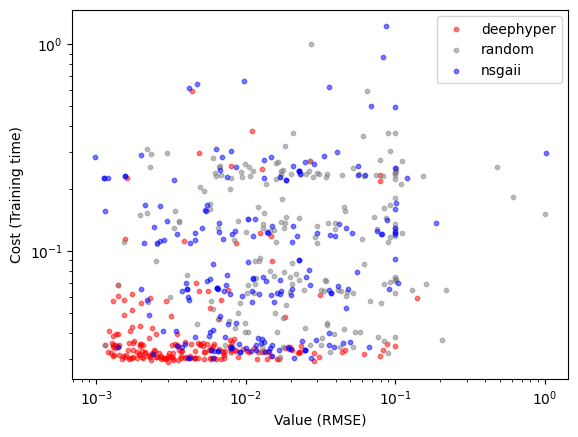

In [21]:
import matplotlib.pyplot as plt


max_objective_0 = max(
    results_default["objective_0"].abs().max(),
    results_random["objective_0"].abs().max())
max_objective_1 = max(
    results_default["objective_1"].abs().max(), 
    results_random["objective_1"].abs().max(),
)

plt.figure()
plt.scatter(
    -results_default["objective_0"]/max_objective_0,
    -results_default["objective_1"]/max_objective_1,
    label="deephyper",
    s=10,
    alpha=0.5,
    c="r",
)
plt.scatter(
    -results_random["objective_0"]/max_objective_0,
    -results_random["objective_1"]/max_objective_1,
    label="random",
    s=10,
    alpha=0.5,
    c="gray",
)

plt.scatter(
    -results_nsgaii["objective_0"]/max_objective_0,
    -results_nsgaii["objective_1"]/max_objective_1,
    label="nsgaii",
    s=10,
    alpha=0.5,
    c="b",
)


plt.xlabel("Value (RMSE)")
plt.ylabel("Cost (Training time)")
plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.savefig(f"output/hpobench/{task_name}/scatter.png")
plt.show()